In [5]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [6]:
image_size=256
batch=32
channels=3
epoch=10


In [8]:
data=tf.keras.preprocessing.image_dataset_from_directory(r"C:\Users\91701\Desktop\certificate\indian currency\New folder",shuffle=True,
                                                         image_size=(image_size,image_size),batch_size=batch)

Found 4881 files belonging to 7 classes.


In [9]:
class_names=data.class_names

In [10]:
class_names

['Rs.10', 'Rs.100', 'Rs.20', 'Rs.200', 'Rs.2000', 'Rs.50', 'Rs.500']

In [11]:
for image_batch,label_batch in data.take(1):
    print(image_batch.shape)
    print(len(label_batch.numpy()))

(32, 256, 256, 3)
32


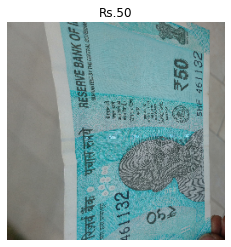

In [12]:
for image_batch,label_batch in data.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8')) #uint8 for converting to int from float
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

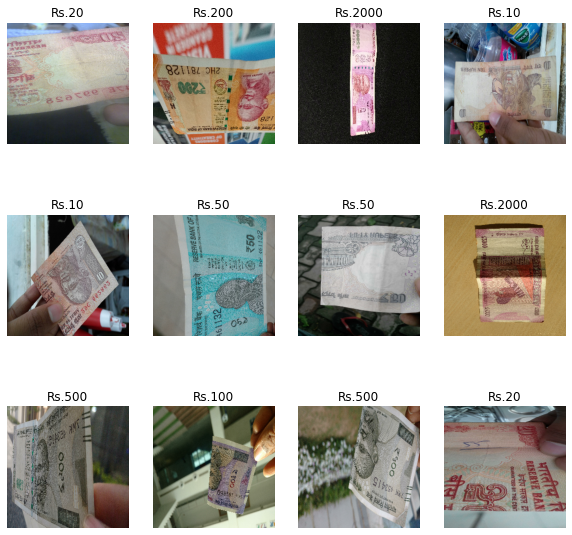

In [13]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in data.take(1):
    for i in range(0,12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8')) #uint8 for converting to int from float
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [14]:
def get_train_test(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [15]:
train,val,test=get_train_test(data)

In [16]:
train=train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val=val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test=test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
#scaling
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1/255),
])

In [18]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [19]:
#model
input_shape = (batch,image_size,image_size,channels)
n_classes = 7

model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [21]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train,
    batch_size=batch,
    validation_data=val,
    verbose=1,
    epochs=10,
)

Epoch 1/10
122/122 [==============================] - 629s 4s/step - loss: 1.8554 - accuracy: 0.2095 - val_loss: 1.6302 - val_accuracy: 0.3312
Epoch 2/10
122/122 [==============================] - 368s 3s/step - loss: 1.5561 - accuracy: 0.3181 - val_loss: 1.4021 - val_accuracy: 0.3720
Epoch 3/10
122/122 [==============================] - 393s 3s/step - loss: 1.3012 - accuracy: 0.4708 - val_loss: 1.0124 - val_accuracy: 0.5914
Epoch 4/10
122/122 [==============================] - 316s 3s/step - loss: 0.8646 - accuracy: 0.6655 - val_loss: 0.9299 - val_accuracy: 0.6323
Epoch 5/10
122/122 [==============================] - 202s 2s/step - loss: 0.7445 - accuracy: 0.7106 - val_loss: 0.6253 - val_accuracy: 0.7806
Epoch 6/10
122/122 [==============================] - 202s 2s/step - loss: 0.5829 - accuracy: 0.7871 - val_loss: 0.5899 - val_accuracy: 0.8000
Epoch 7/10
122/122 [==============================] - 207s 2s/step - loss: 0.5603 - accuracy: 0.7887 - val_loss: 0.5894 - val_accuracy: 0.7720

In [23]:
scores = model.evaluate(test)

16/16 [==============================] - 111s 507ms/step - loss: 0.5032 - accuracy: 0.8242


In [24]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 122}

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
len(history.history['loss'])

10

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

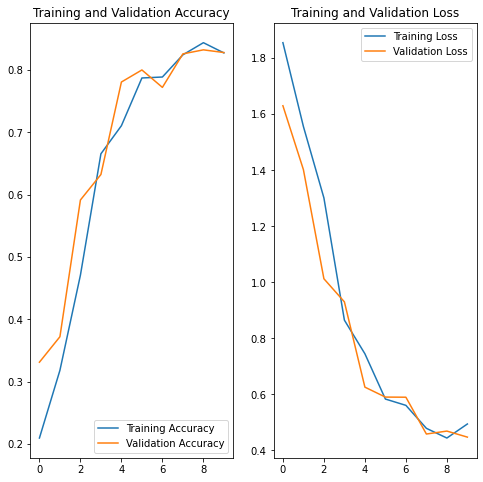

In [28]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epoch), acc, label='Training Accuracy')
plt.plot(range(epoch), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epoch), loss, label='Training Loss')
plt.plot(range(epoch), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Rs.2000
1/1 [==============================] - 1s 903ms/step
predicted label: Rs.2000


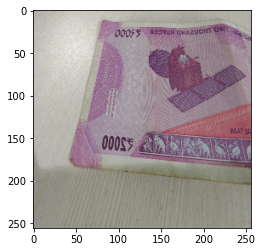

In [29]:
import numpy as np
for images_batch, labels_batch in test.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 52ms/step


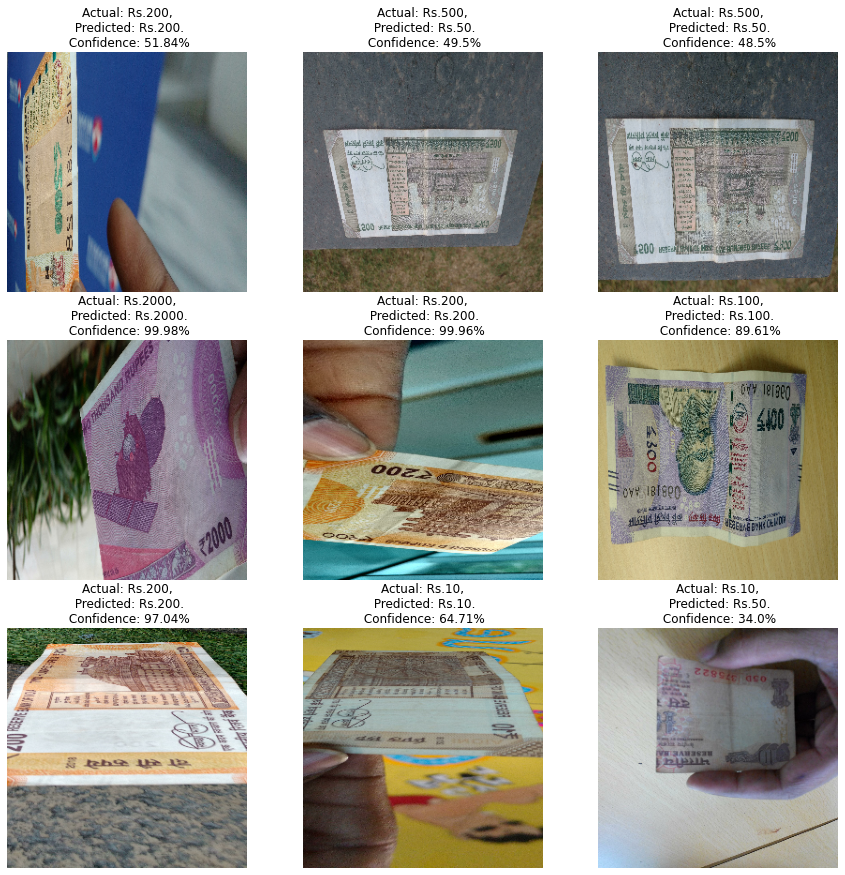

In [31]:
plt.figure(figsize=(15, 15))
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [33]:
pip install opencv-python

In [34]:
import cv2

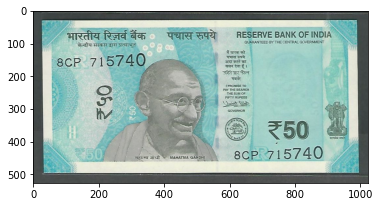

In [37]:
im=cv2.imread(r"C:\Users\91701\Desktop\50.jpg")
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
plt.show()

In [38]:
predict(model,im)

1/1 [==============================] - 0s 131ms/step


('Rs.50', 34.0)